<ipython-input-10-695c15df3c8d>:55: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'timestamp': pd.date_range(start='2023-01-01', periods=15, freq='M')



KS Statistic: 0.2286
P-value: 0.9899
✅ No significant data drift detected.


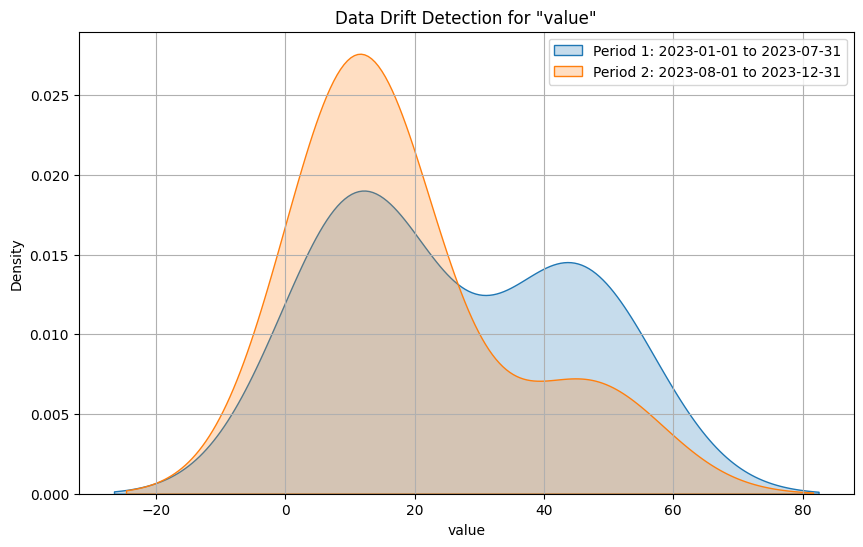

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

def detect_data_drift(df, column, timestamp_col, start_date_1, end_date_1, start_date_2, end_date_2):
    # Validate inputs
    if df.empty:
        print("The dataset is empty.")
        return

    if column not in df.columns or timestamp_col not in df.columns:
        print("Specified column or timestamp column not found in the DataFrame.")
        return

    if not pd.api.types.is_numeric_dtype(df[column]):
        print(f"The column '{column}' must be numeric.")
        return

    # Convert timestamp column to datetime
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])

    # Split data into two time periods
    period1 = df[(df[timestamp_col] >= start_date_1) & (df[timestamp_col] <= end_date_1)][column].dropna()
    period2 = df[(df[timestamp_col] >= start_date_2) & (df[timestamp_col] <= end_date_2)][column].dropna()

    if period1.empty or period2.empty:
        print("One or both periods have no valid data.")
        return

    # Perform KS test
    stat, p_value = ks_2samp(period1, period2)

    print(f"\nKS Statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("⚠️ Significant data drift detected.")
    else:
        print("✅ No significant data drift detected.")

    # Plot distributions
    plt.figure(figsize=(10, 6))
    sns.kdeplot(period1, label=f'Period 1: {start_date_1} to {end_date_1}', fill=True)
    sns.kdeplot(period2, label=f'Period 2: {start_date_2} to {end_date_2}', fill=True)
    plt.title(f'Data Drift Detection for "{column}"')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Sample usage
data = {
    'value': [10, 12, 11, 13, 45, 46, 44, 47, 10, 11, 13, 12, 50, 51, 49],
    'timestamp': pd.date_range(start='2023-01-01', periods=15, freq='M')
}
df = pd.DataFrame(data)

# Detect drift
detect_data_drift(
    df=df,
    column='value',
    timestamp_col='timestamp',
    start_date_1='2023-01-01',
    end_date_1='2023-07-31',
    start_date_2='2023-08-01',
    end_date_2='2023-12-31'
)
